<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('Dataset/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.shape

(4653, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

<h2>EDA</h2>

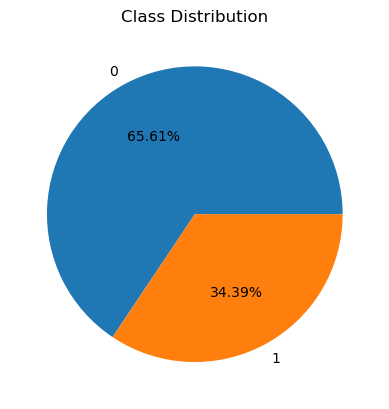

In [7]:
plt.pie(df['LeaveOrNot'].value_counts(), labels=df['LeaveOrNot'].value_counts().index, autopct='%1.2f%%')
plt.title('Class Distribution')
plt.show();

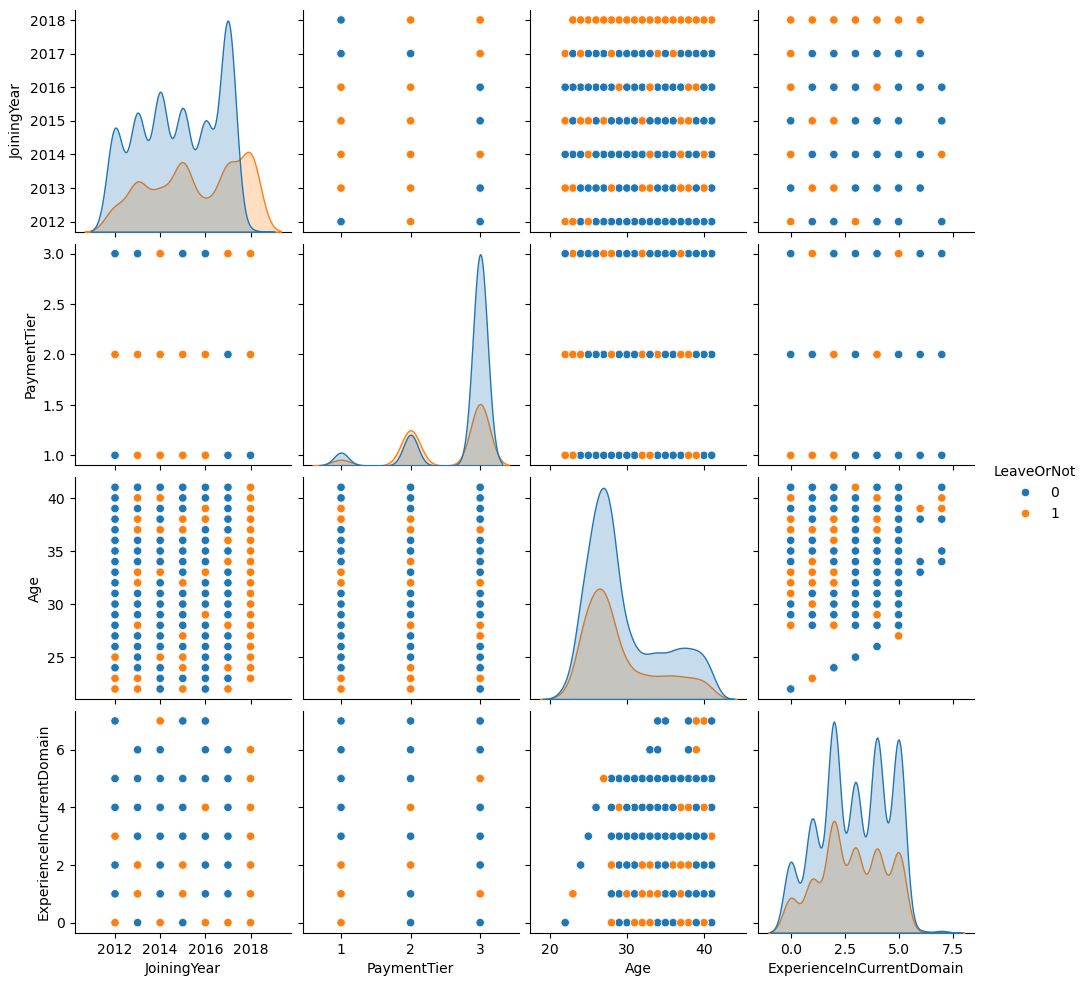

In [8]:
sns.pairplot(df, hue='LeaveOrNot')

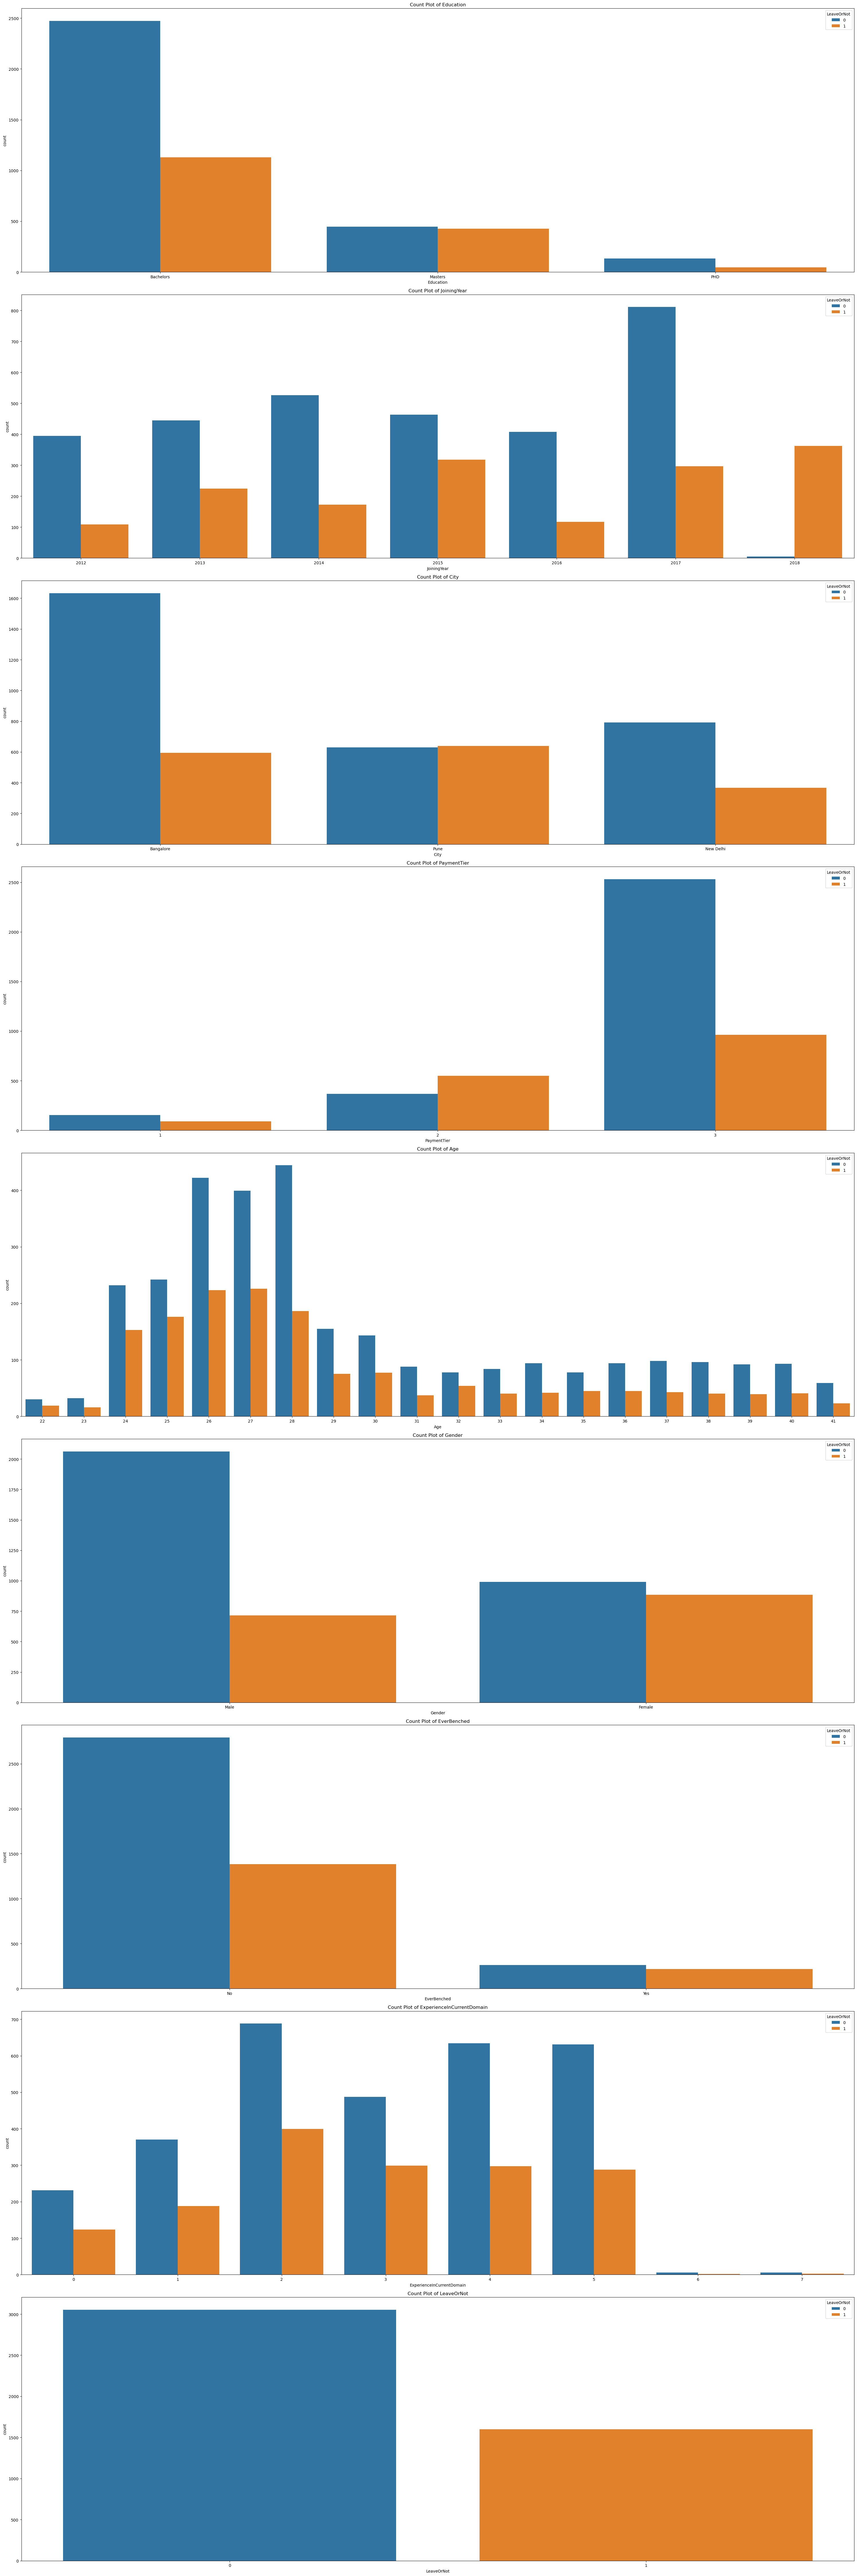

In [9]:
# Create subplots
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(30, 10 * len(df.columns)))

# Loop through columns and plot countplots
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df['LeaveOrNot'], ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")

plt.tight_layout()
plt.show();

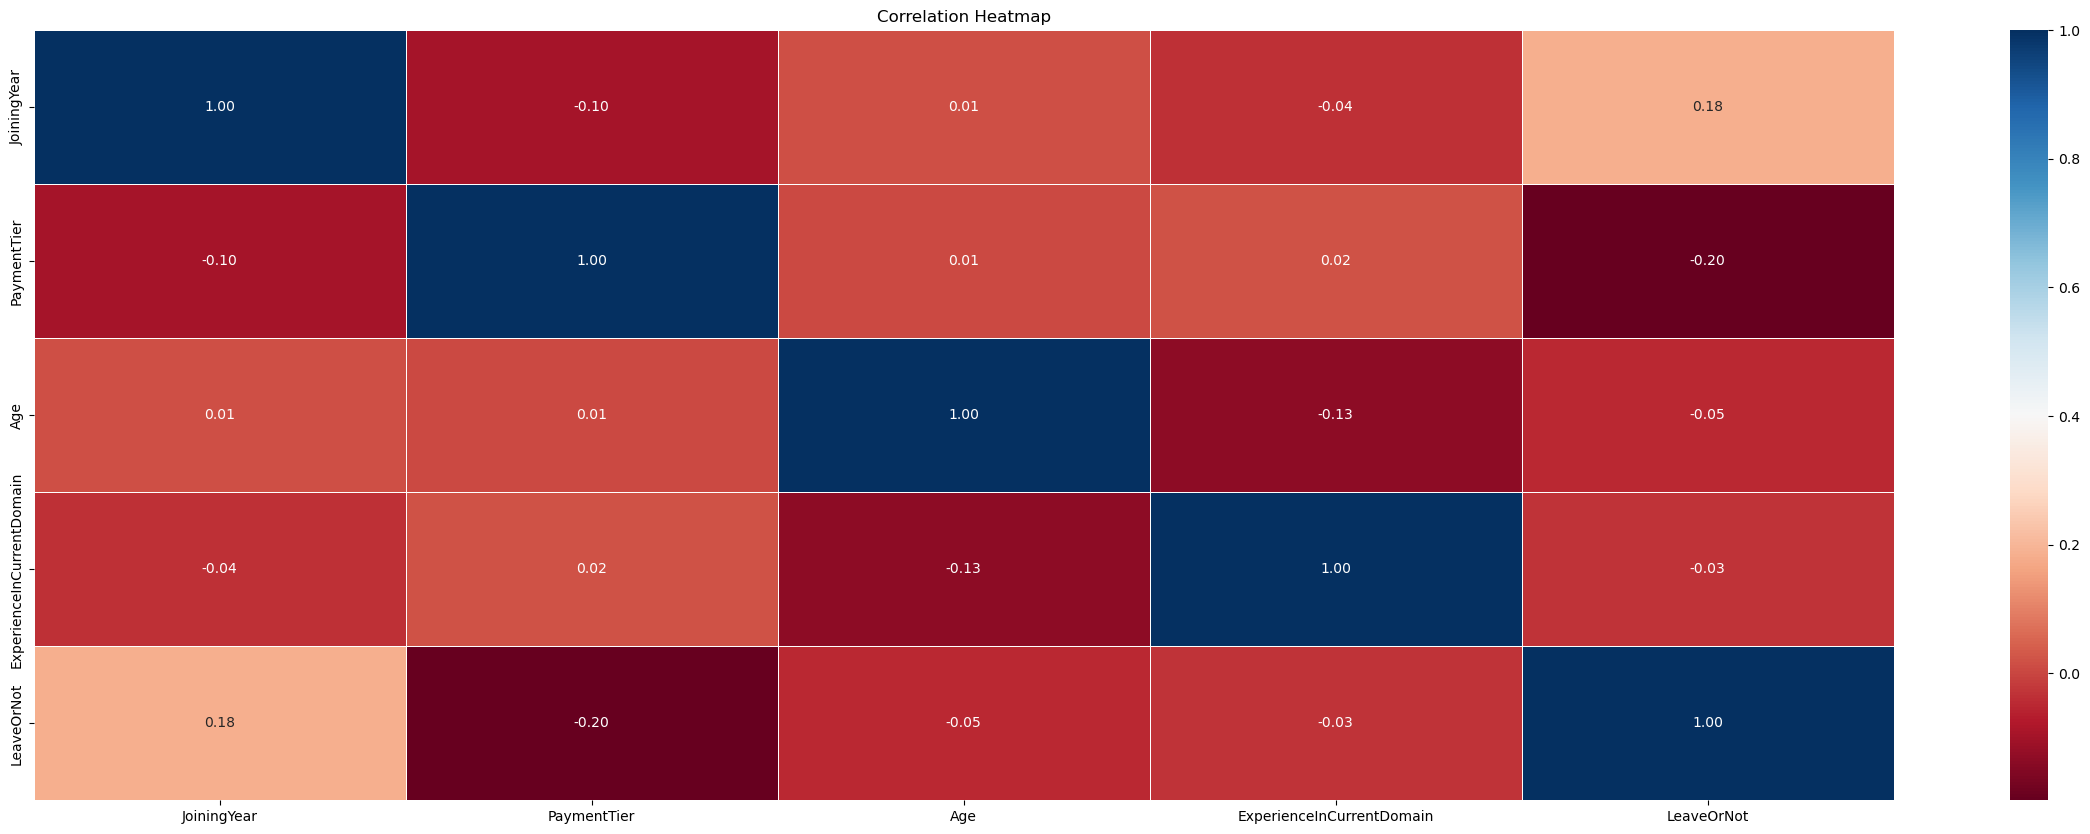

In [10]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

<h2>Data Splitting</h2>

In [11]:
x = df.drop(['LeaveOrNot'], axis=1)
y = df['LeaveOrNot']

In [12]:
x_dummies = pd.get_dummies(x, drop_first=True)
x_dummies.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,False,False,False,False,True,False
1,2013,1,28,3,False,False,False,True,False,False
2,2014,3,38,2,False,False,True,False,False,False
3,2016,3,27,5,True,False,False,False,True,False
4,2017,3,24,2,True,False,False,True,True,True


In [13]:
le = LabelEncoder()
x_dummies['JoiningYear'] = le.fit_transform(x_dummies['JoiningYear'])

In [14]:
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
label_mapping

{2012: 0, 2013: 1, 2014: 2, 2015: 3, 2016: 4, 2017: 5, 2018: 6}

In [15]:
x_dummies

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,5,3,34,0,False,False,False,False,True,False
1,1,1,28,3,False,False,False,True,False,False
2,2,3,38,2,False,False,True,False,False,False
3,4,3,27,5,True,False,False,False,True,False
4,5,3,24,2,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
4648,1,3,26,4,False,False,False,False,False,False
4649,1,2,37,2,True,False,False,True,True,False
4650,6,3,27,5,True,False,True,False,True,False
4651,0,3,30,2,False,False,False,False,True,True


In [16]:
x_dummies.shape

(4653, 10)

In [17]:
columns = x_dummies.columns.tolist()
joblib.dump(columns, 'columns.pkl') # Save

['columns.pkl']

In [18]:
columns

['JoiningYear',
 'PaymentTier',
 'Age',
 'ExperienceInCurrentDomain',
 'Education_Masters',
 'Education_PHD',
 'City_New Delhi',
 'City_Pune',
 'Gender_Male',
 'EverBenched_Yes']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h2>Machine Learning</h2>

In [20]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)
print('Training score:',rf.score(x_train, y_train))
print('Testing score:',rf.score(x_test,y_test))

Training score: 0.8911875335840945
Testing score: 0.8764769065520945


In [21]:
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       610
           1       0.88      0.74      0.80       321

    accuracy                           0.88       931
   macro avg       0.88      0.84      0.86       931
weighted avg       0.88      0.88      0.87       931



In [22]:
# Save the ML model
joblib.dump(rf, 'ML_model.pkl')
print("ML model saved successfully!")

ML model saved successfully!


<h2>Deep Learning</h2>

In [23]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

In [24]:
DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
DL_model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = DL_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)], class_weight=class_weight_dict)

Epoch 1/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.7008 - loss: 0.5652 - val_accuracy: 0.7991 - val_loss: 0.4533
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7777 - loss: 0.4920 - val_accuracy: 0.8335 - val_loss: 0.4116
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8000 - loss: 0.4588 - val_accuracy: 0.8647 - val_loss: 0.3990
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8314 - loss: 0.4292 - val_accuracy: 0.8518 - val_loss: 0.4079
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8350 - loss: 0.4054 - val_accuracy: 0.8690 - val_loss: 0.3530
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8485 - loss: 0.4013 - val_accuracy: 0.8056 - val_loss: 0.4393
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8316 - loss: 0.4139 - val_accuracy: 0.8690 - val_loss: 0.3646
Epoch 8/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8525 - loss: 0.3790 - val_accur

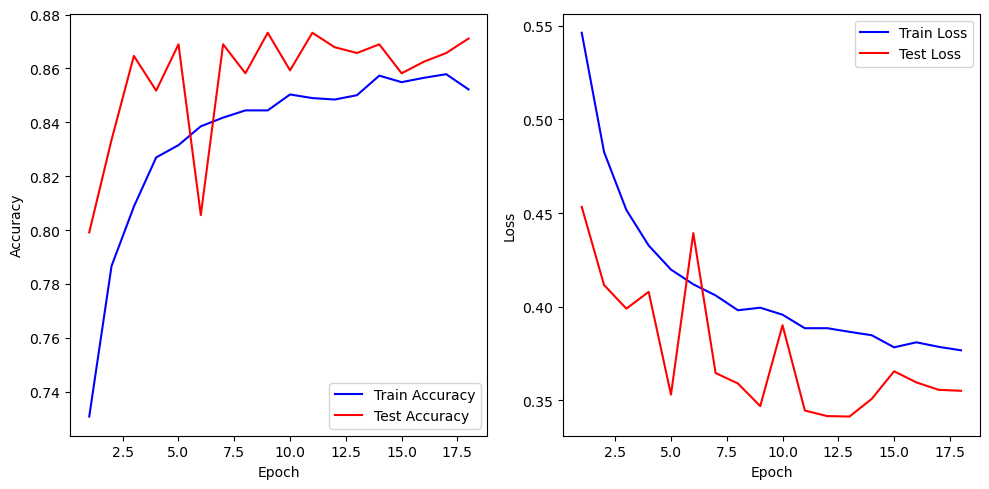

In [25]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [26]:
pred = DL_model.predict(x_test)
y_pred = (pred>0.5)
accuracy_score(y_test, y_pred)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


0.8711063372717508

In [27]:
cr_DL = classification_report(y_test, y_pred)
print(cr_DL)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       610
           1       0.88      0.73      0.80       321

    accuracy                           0.87       931
   macro avg       0.87      0.84      0.85       931
weighted avg       0.87      0.87      0.87       931



In [28]:
# Save the DL model
DL_model.save('DL_model.keras')
print("DL model saved successfully!")

DL model saved successfully!


<h2>Machine Learning vs Deep Learning</h2>

In [30]:
# Load Models and dummies
ML_model = joblib.load('ML_model.pkl')
DL_model = load_model("DL_model.keras")
columns = joblib.load('columns.pkl')
new_data_dict = {
    'JoiningYear': [5],
    'PaymentTier': [3],
    'Age': [32],
    'ExperienceInCurrentDomain': [4],
    'Education_Masters': [False],
    'Education_PHD': [False],
    'City_New Delhi': [False],
    'City_Pune': [False],
    'Gender_Male': [True],
    'EverBenched_Yes': [False]
}

new_df = pd.DataFrame(new_data_dict)
new_df_dummies = pd.get_dummies(new_df, drop_first=True)
new_df_dummies = new_df_dummies.reindex(columns=columns, fill_value=0)

new_df_scaled = sc.transform(new_df_dummies)

ML_prediction = ML_model.predict(new_df_scaled)

new_df_scaled = np.expand_dims(new_df_scaled, axis=-1)
y_pred = DL_model.predict(new_df_scaled)
DL_prediction = np.argmax(y_pred, axis=1)

print("ML Heart Disease Predicted:", ML_prediction)
print("DL Heart Disease Predicted:", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
ML Heart Disease Predicted: [0]
DL Heart Disease Predicted: [0]
